In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


#### Load Views * Events

In [2]:
pd.read_csv("../download/page_views.csv", nrows = 10).head()

,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,1fd5f051fba643,120,31905835,1,RS,2
1,8557aa9004be3b,120,32053104,1,VN>44,2
2,c351b277a358f0,120,54013023,1,KR>12,1
3,8205775c5387f9,120,44196592,1,IN>16,2
4,9cb0ccd8458371,120,65817371,1,US>CA>807,2


In [3]:
pd.read_csv("../download/events.csv", nrows = 10).head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [3]:
events_docs = pd.DataFrame({'document_id':pd.read_csv("../download/events.csv", usecols=['document_id'])['document_id'].unique()})
events_docs.count()

document_id    894060
dtype: int64

In [ ]:
filename = "../generated/page_views_event_docs_size.csv" #"../generated/page_views_event_docs_timestamps.csv"

In [4]:
chunksize = 20 * 10 ** 6

#uuidUnique = np.ndarray([]) # there are 9,202,150 unique uuid out of 10,000,000 records - no sense to read (?)
docsUnique = np.ndarray([], dtype=int)

len_total = 0
len_without_na = 0
len_valid = 0
len_events_docsTimestamps = 0

loop = 0
first_time = True

f = open(filename, 'w')

for chunk in pd.read_csv("../download/page_views.csv", chunksize=chunksize, usecols = ['document_id', 'timestamp']):
    l0 = len(chunk)
    len_total += l0
    
    chunk = chunk.dropna()
    l1 = len(chunk)
    len_without_na += l1
        
    chunk = chunk[(chunk['timestamp']>=0)&(chunk['timestamp']<1281600002)]    
    l2 = len(chunk)
    len_valid += l2
    
    #docsUnique = np.unique(np.append(docsUnique, np.unique(chunk['document_id'])))
    
    events_docsTimestamps = pd.merge(chunk, events_docs, on=['document_id'])
    #events_docsTimestamps = events_docsTimestamps.sort_values(by=['document_id', 'timestamp'])
    
    events_docsTimestamps = pd.DataFrame({'size':events_docsTimestamps.groupby(['document_id'])['timestamp'].size()}).reset_index()
    
    len_events_docsTimestamps += len(events_docsTimestamps)
    
    if first_time:
        events_docsTimestamps.to_csv(f, index = False, header=True)
        f.close()
        f = open(filename, 'a')
        first_time = False
    else:
        events_docsTimestamps.to_csv(f, index = False, header=False)
 
    loop += 1
    print loop, ':', len_events_docsTimestamps, len_total, len_without_na, len_valid

f.close()
print len_total, len_without_na, len_valid   #2,034,275,448 2,006,359,732,   unique: 2,823,600


1 : 52916 20000000 20000000 20000000
2 : 110882 40000000 40000000 40000000
3 : 167231 60000000 60000000 60000000
4 : 221292 80000000 80000000 80000000
5 : 274125 100000000 100000000 100000000
6 : 328596 120000000 120000000 120000000
7 : 382164 140000000 140000000 140000000
8 : 435000 160000000 160000000 160000000
9 : 494719 180000000 180000000 180000000
10 : 559566 200000000 200000000 200000000
11 : 614349 220000000 220000000 220000000
12 : 672371 240000000 240000000 240000000
13 : 727225 260000000 260000000 260000000
14 : 785848 280000000 280000000 280000000
15 : 836040 300000000 300000000 300000000
16 : 899280 320000000 320000000 320000000
17 : 961590 340000000 340000000 340000000
18 : 1022782 360000000 360000000 360000000
19 : 1084210 380000000 380000000 380000000
20 : 1139167 400000000 400000000 400000000
21 : 1197936 420000000 420000000 420000000
22 : 1248533 440000000 440000000 440000000
23 : 1314778 460000000 460000000 460000000
24 : 1383139 480000000 480000000 480000000
25 : 14

In [6]:
events_docsTimestamps = pd.read_csv(filename, dtype = {'document_id':int, 'size':int})
events_docsTimestamps = pd.DataFrame({'size':events_docsTimestamps.groupby(['document_id'])['size'].sum()}).reset_index()
events_docsTimestamps.to_csv(filename, index = False)
events_docsTimestamps.head()

,document_id,size
0,2,19354
1,4,7
2,5,718
3,7,124
4,8,462


In [8]:
events_docsTimestamps.count()

document_id    891782
size           891782
dtype: int64

In [11]:
events_docsTimestamps['size'].describe()

count    8.917820e+05
mean     1.935663e+03
std      3.475446e+04
min      1.000000e+00
25%      8.000000e+01
50%      2.640000e+02
75%      8.750000e+02
max      2.630368e+07
Name: size, dtype: float64

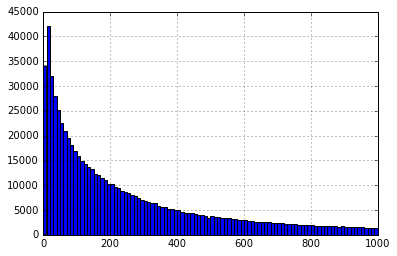

In [26]:
events_docsTimestamps[events_docsTimestamps['size']<1000]['size'].hist(bins = 100)

#### Unique values for further joins

##### Views

In [2]:
docsUnique = pd.read_csv("../generated/page_vievs_docs_unique.csv")
docsUnique.count()  #2,823,600

Unnamed: 0     2823600
document_id    2823600
dtype: int64

In [4]:
page_views_event_docs_size = pd.read_csv("../generated/page_views_event_docs_size.csv", dtype = {'document_id':int, 'size':int})
page_views_event_docs_size.count()


document_id    891782
size           891782
dtype: int64

##### Ads

In [8]:
ads = pd.read_csv("../download/promoted_content.csv", usecols=['ad_id', 'document_id'])

In [9]:
ads_docsUnique = pd.DataFrame({'document_id': ads.document_id.unique() })
ads_docsUnique.count() #185,709

document_id    185709
dtype: int64

In [10]:
ads_adsUnique = pd.DataFrame({'ad_id': ads.ad_id.unique() })
ads_adsUnique.count() #559,583

ad_id    559583
dtype: int64

##### Events

In [11]:
events = pd.read_csv("../download/events.csv", usecols=['display_id', 'document_id'])

In [12]:
events_docsUnique = pd.DataFrame({'document_id': events.document_id.unique() })
events_docsUnique.count() #894,060

document_id    894060
dtype: int64

In [16]:
events_dispUnique = pd.DataFrame({'display_id': events.display_id.unique() })
events_dispUnique.count() #23,120,126

display_id    23120126
dtype: int64

##### Clicks

In [20]:
clicks_train = pd.read_csv("../download/clicks_train.csv", usecols = ['display_id', 'ad_id', 'clicked'])
clicks_test = pd.read_csv("../download/clicks_test.csv", usecols = ['display_id', 'ad_id'])
clicks = clicks_train.append(clicks_test)
clicks.count()  #119,366,893

ad_id         119366893
clicked        87141731
display_id    119366893
dtype: int64

In [21]:
clicks_adsUnique = pd.DataFrame({'ad_id': clicks.ad_id.unique() })
clicks_adsUnique.count()  #544,300

ad_id    544300
dtype: int64

In [22]:
clicks_dispUnique = pd.DataFrame({'display_id': clicks.display_id.unique() })
clicks_dispUnique.count() #23,120,126

display_id    23120126
dtype: int64

#### Joins

##### Ads document_id in Views and Events

In [6]:
ads_docsUnique_viewed = pd.merge(ads_docsUnique, docsUnique, on=['document_id'])
print len(ads_docsUnique)
ads_docsUnique_viewed.count() #21,896 out of #185,709 in ads  (at least 22% of ads were never clicked (explore_clicks), 10% of cklicked ad docs were ever logged)

185709


document_id    21896
Unnamed: 0     21896
dtype: int64

In [14]:
ads_docsUnique_events = pd.merge(ads_docsUnique, events_docsUnique, on=['document_id'])
print len(ads_docsUnique)
ads_docsUnique_events.count() #11,282 out of #185,709 in ads

185709


document_id    11282
dtype: int64

#### Does meta of documents in View covers meta of documents in ads land documents? 

In [15]:
ads_docsUnique_events.count()

document_id    11282
dtype: int64

Sources and publishers - Yes!

In [17]:
docs_meta = pd.read_csv("../download/documents_meta.csv", usecols=['document_id', 'source_id', 'publisher_id']) 
docs_meta.count()

document_id     2999334
source_id       2996816
publisher_id    2935310
dtype: int64

In [18]:
ads_docs_meta = pd.merge(ads_docsUnique_events, docs_meta, on='document_id', how='left')
ads_docs_meta.count()

document_id     11282
source_id       11282
publisher_id    11282
dtype: int64

In [19]:
ads_docs_meta_sources = pd.DataFrame({'source_id' : ads_docs_meta['source_id'].unique()})
ads_docs_meta_publishers = pd.DataFrame({'publisher_id' : ads_docs_meta['publisher_id'].unique()})
print len(ads_docs_meta_sources), len(ads_docs_meta_publishers)

364 142


In [20]:
view_docs_meta = pd.merge(page_views_event_docs_size, docs_meta, on='document_id', how='left')
view_docs_meta.count()

document_id     891782
size            891782
source_id       891672
publisher_id    891671
dtype: int64

In [21]:
view_docs_meta_sources = pd.DataFrame({'source_id' : view_docs_meta['source_id'].unique()})
view_docs_meta_publishers = pd.DataFrame({'publisher_id' : view_docs_meta['publisher_id'].unique()})
print len(view_docs_meta_sources), len(view_docs_meta_publishers)

4958 489


In [24]:
print len(pd.merge(ads_docs_meta_sources, view_docs_meta_sources, on='source_id')),len(pd.merge(ads_docs_meta_publishers, view_docs_meta_publishers, on='publisher_id')) 

364 142


Topics - Yes!

In [26]:
docs_topics = pd.read_csv("../download/documents_topics.csv", usecols=['document_id', 'topic_id'])
docs_topics.count()

document_id    11325960
topic_id       11325960
dtype: int64

In [31]:
ads_docs_topics = pd.DataFrame({'topic_id' : pd.merge(ads_docsUnique_events, docs_topics, on='document_id', how='left')['topic_id'].unique()})
ads_docs_topics.count()

topic_id    300
dtype: int64

In [32]:
view_docs_topics = pd.DataFrame({'topic_id' : pd.merge(page_views_event_docs_size, docs_topics, on='document_id', how='left')['topic_id'].unique()})
view_docs_topics.count()

topic_id    300
dtype: int64

In [33]:
pd.merge(ads_docs_topics, view_docs_topics, on='topic_id').count()

topic_id    300
dtype: int64

Entities - 1 out of 15389 is missing

In [34]:
docs_ent = pd.read_csv("../download/documents_entities.csv", usecols=['document_id', 'entity_id'])
docs_ent.count()

document_id    5537552
entity_id      5537552
dtype: int64

In [38]:
ads_docs_ent = pd.DataFrame({'entity_id' : pd.merge(ads_docsUnique_events, docs_ent, on='document_id', how='left')['entity_id'].unique()})
ads_docs_ent.count()

entity_id    15389
dtype: int64

In [39]:
view_docs_ent = pd.DataFrame({'entity_id' : pd.merge(page_views_event_docs_size, docs_ent, on='document_id', how='left')['entity_id'].unique()})
view_docs_ent.count()

entity_id    507335
dtype: int64

In [40]:
pd.merge(ads_docs_ent, view_docs_ent, on='entity_id').count()

entity_id    15388
dtype: int64

Categories - Yes!

In [41]:
docs_cat = pd.read_csv("../download/documents_categories.csv", usecols=['document_id', 'category_id'])
docs_cat.count()

document_id    5481475
category_id    5481475
dtype: int64

In [43]:
ads_docs_cat = pd.DataFrame({'category_id' : pd.merge(ads_docsUnique_events, docs_cat, on='document_id', how='left')['category_id'].unique()})
ads_docs_cat.count()

category_id    89
dtype: int64

In [44]:
view_docs_cat = pd.DataFrame({'category_id' : pd.merge(page_views_event_docs_size, docs_cat, on='document_id', how='left')['category_id'].unique()})
view_docs_cat.count()

category_id    90
dtype: int64

In [45]:
pd.merge(ads_docs_cat, view_docs_cat, on='category_id').count()

category_id    89
dtype: int64

###### Are document_id of clicked Ads available in Views? - Small part only

In [7]:
clicksPerAd = pd.read_csv("../generated/clicksPerAd.csv")
clicksPerAd.count()

ad_id     478950
clicks    478950
dtype: int64

In [8]:
clicksPerAd = pd.merge(clicksPerAd, ads, on=['ad_id'])
clicksPerAd.count()

ad_id          478950
clicks         478950
document_id    478950
dtype: int64

In [9]:
clicksPerAd_DocsUnique = pd.DataFrame({'document_id':clicksPerAd['document_id'].unique()})
clicksPerAd_DocsUnique.count()

document_id    164476
dtype: int64

In [11]:
clicksPerAd_non0_DocsUnique = pd.DataFrame({'document_id':clicksPerAd[clicksPerAd['clicks']>0]['document_id'].unique()})
clicksPerAd_non0_DocsUnique.count()

document_id    90873
dtype: int64

In [68]:
clickedDocs_views = pd.merge(clicksPerAd_non0_DocsUnique, docsUnique, on=['document_id'])
print len(clicksPerAd_non0_DocsUnique)
clickedDocs_views.count()

90873


document_id    11313
Unnamed: 0     11313
dtype: int64

##### Events document_id in Views

In [17]:
events_docsUnique_viewed = pd.merge(events_docsUnique, docsUnique, on=['document_id'])
print len(events_docsUnique)
events_docsUnique_viewed.count() #891,782 out of #894,060

894060


document_id    891782
Unnamed: 0     891782
dtype: int64

In [18]:
events_docsUnique_viewed.to_csv("../generated/events_docsUnique_viewed.csv", index = False)

View_page data can be usefull for Event documents analysis

##### Ads ad_id in Clicks

In [23]:
ads_adsUnique_clicks = pd.merge(ads_adsUnique, clicks_adsUnique, on=['ad_id'])
print len(ads_adsUnique)
ads_adsUnique_clicks.count() #544,300 out of #559,583 in ads

559583


ad_id    544300
dtype: int64

##### Ads from Clicks document_id in Views 

##### Events display_id in Clicks

In [24]:
events_dispUnique_clicks = pd.merge(events_dispUnique, clicks_dispUnique, on=['display_id'])
print len(events_dispUnique)
events_dispUnique_clicks.count()  #23,120,126 out of #23,120,126

23120126


display_id    23120126
dtype: int64